In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
df = pd.read_excel('CleanedCarSales.xlsx')

# Quick peek at data
df.head()

,CAR_ID,TRANSACTION_DATE,CUSTOMER_NAME,CUSTOMER_GENDER,CUSTOMER_ANNUAL_INCOME,DEALERSHIP_NAME,CAR_BRAND,CAR_MODEL,CAR_ENGINE,CAR_TRANSMISSION,CAR_COLOR,CAR_PRICE,DEALER_NO,CAR_BODY_STYLE,CUSTOMER_PHONE,DEALERSHIP_REGION
0,C_CND_000001,01/02/2022,Geraldine,M,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,01/02/2022,Gia,M,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,01/02/2022,Gianna,M,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,01/02/2022,Giselle,M,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,01/02/2022,Grace,M,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CAR_ID                  23906 non-null  object
 1   TRANSACTION_DATE        23906 non-null  object
 2   CUSTOMER_NAME           23905 non-null  object
 3   CUSTOMER_GENDER         23906 non-null  object
 4   CUSTOMER_ANNUAL_INCOME  23906 non-null  int64 
 5   DEALERSHIP_NAME         23906 non-null  object
 6   CAR_BRAND               23906 non-null  object
 7   CAR_MODEL               23906 non-null  object
 8   CAR_ENGINE              23906 non-null  object
 9   CAR_TRANSMISSION        23906 non-null  object
 10  CAR_COLOR               23906 non-null  object
 11  CAR_PRICE               23906 non-null  int64 
 12  DEALER_NO               23906 non-null  object
 13  CAR_BODY_STYLE          23906 non-null  object
 14  CUSTOMER_PHONE          23906 non-null  int64 
 15  DE

In [19]:
df['TRANSACTION_DATE'] = pd.to_datetime(df['TRANSACTION_DATE'], errors='coerce')

df['CUSTOMER_ANNUAL_INCOME'] = (
    df['CUSTOMER_ANNUAL_INCOME']
    .replace(r'[\$, ]', '', regex=True)  # <-- use r'' here
    .astype(float)
)

df['CUSTOMER_PHONE'] = df['CUSTOMER_PHONE'].astype(str)

df['CAR_ID'] = df['CAR_ID'].astype(str)

df['DEALER_NO'] = df['DEALER_NO'].astype(str)

In [20]:
cat_cols = [
    'CUSTOMER_GENDER', 'DEALERSHIP_NAME', 'CAR_BRAND', 'CAR_MODEL',
    'CAR_ENGINE', 'CAR_TRANSMISSION', 'CAR_COLOR', 'CAR_BODY_STYLE',
    'DEALERSHIP_REGION'
]
for col in cat_cols:
    df[col] = df[col].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CAR_ID                  23906 non-null  object        
 1   TRANSACTION_DATE        23906 non-null  datetime64[ns]
 2   CUSTOMER_NAME           23905 non-null  object        
 3   CUSTOMER_GENDER         23906 non-null  category      
 4   CUSTOMER_ANNUAL_INCOME  23906 non-null  float64       
 5   DEALERSHIP_NAME         23906 non-null  category      
 6   CAR_BRAND               23906 non-null  category      
 7   CAR_MODEL               23906 non-null  category      
 8   CAR_ENGINE              23906 non-null  category      
 9   CAR_TRANSMISSION        23906 non-null  category      
 10  CAR_COLOR               23906 non-null  category      
 11  CAR_PRICE               23906 non-null  int64         
 12  DEALER_NO               23906 non-null  object

In [24]:
print(df['CAR_BRAND'].value_counts().head(10))

CAR_BRAND
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Name: count, dtype: int64


In [25]:
print(df['DEALERSHIP_NAME'].value_counts().head(10))

DEALERSHIP_NAME
Progressive Shippers Cooperative Association No    1318
Rabun Used Car Sales                               1313
Race Car Help                                      1253
Saab-Belle Dodge                                   1251
Tri-State Mack Inc                                 1249
Star Enterprises Inc                               1249
Ryder Truck Rental and Leasing                     1248
U-Haul CO                                          1247
Scrivener Performance Engineering                  1246
Suburban Ford                                      1243
Name: count, dtype: int64


In [26]:
print(df['CUSTOMER_GENDER'].value_counts().head(10))

CUSTOMER_GENDER
M    18798
F     5108
Name: count, dtype: int64


In [27]:
print(df['CAR_ENGINE'].value_counts().head(10))

CAR_ENGINE
Double Overhead Camshaft    12571
Overhead Camshaft           11335
Name: count, dtype: int64


In [28]:
print(df['CAR_TRANSMISSION'].value_counts().head(10))

CAR_TRANSMISSION
Auto      12571
Manual    11335
Name: count, dtype: int64


In [29]:
print(df['CAR_COLOR'].value_counts().head(10))

CAR_COLOR
Pale White    11256
Black          7857
Red            4793
Name: count, dtype: int64


In [30]:
print(df['DEALERSHIP_REGION'].value_counts().head(10))

DEALERSHIP_REGION
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


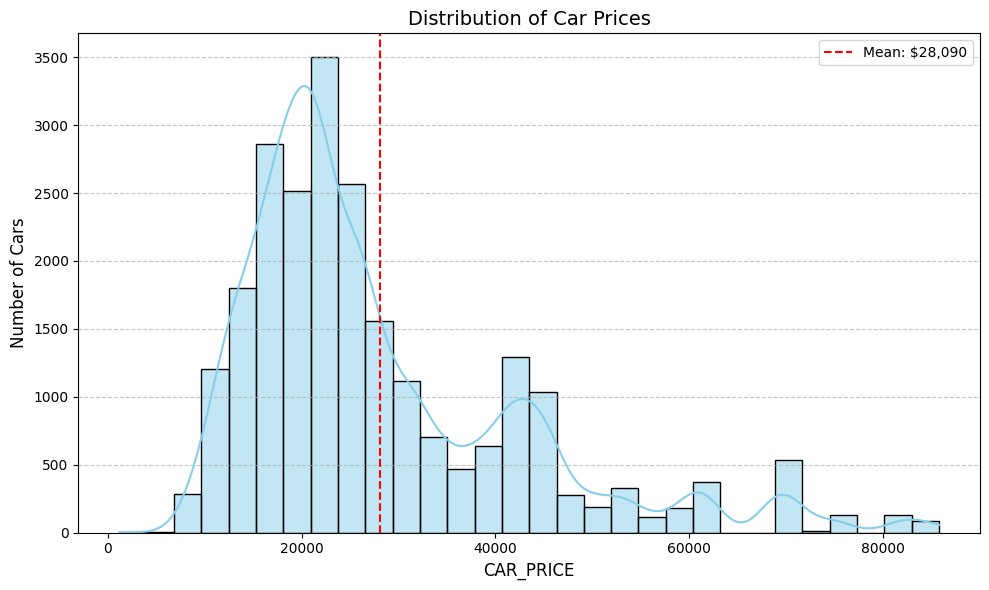

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['CAR_PRICE'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title("Distribution of Car Prices", fontsize=14)
plt.xlabel("CAR_PRICE", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.axvline(df['CAR_PRICE'].mean(), color='red', linestyle='--', label=f"Mean: ${df['CAR_PRICE'].mean():,.0f}")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
highest_price = df['CAR_PRICE'].max()
print(f"Highest car sold: ${highest_price:,.0f}")

Highest car sold: $85,800


In [33]:
lowest_price = df['CAR_PRICE'].min()
print(f"Lowest car sold: ${lowest_price:,.0f}")

Lowest car sold: $1,200


In [34]:
# Define price bins, e.g., every $5,000
bins = pd.interval_range(start=0, end=df['CAR_PRICE'].max()+5000, freq=5000)

# Cut prices into these bins
df['PriceRange'] = pd.cut(df['CAR_PRICE'], bins)

# Find the most frequent bin
most_common_bin = df['PriceRange'].value_counts().idxmax()
print(f"Most cars sold are in the price range of {most_common_bin.left:,.0f}$ - {most_common_bin.right:,.0f}$")

Most cars sold are in the price range of 15,000$ - 20,000$


In [35]:
average_price = df['CAR_PRICE'].mean()
median_price = df['CAR_PRICE'].median()

print(f"Average car sold price: ${average_price:,.0f}")
print(f"Median car sold price: ${median_price:,.0f}")

Average car sold price: $28,090
Median car sold price: $23,000


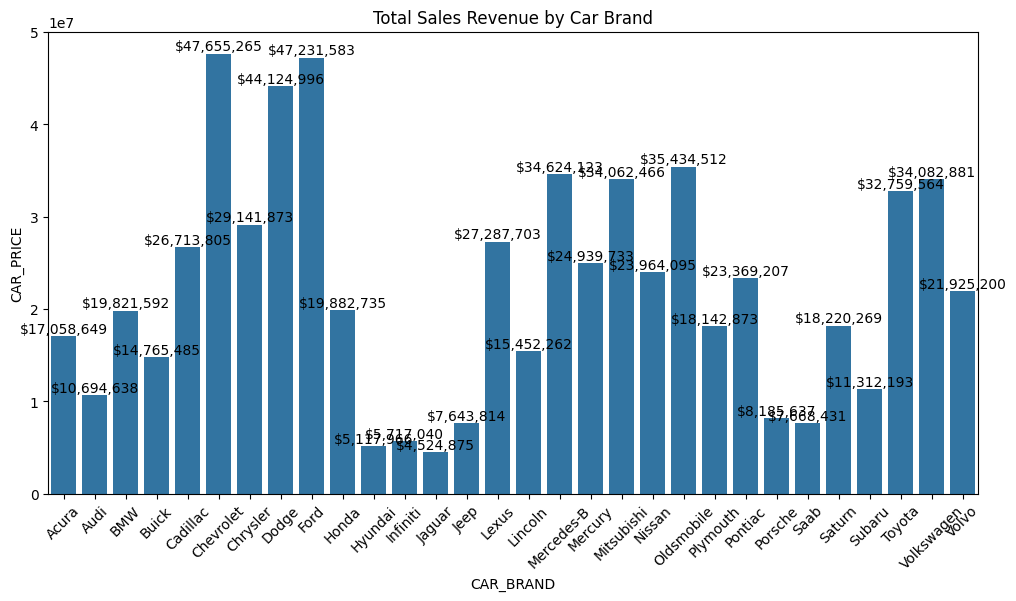

In [36]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='CAR_BRAND', y='CAR_PRICE', data=df, estimator=sum, errorbar=None)
plt.xticks(rotation=45)
plt.title('Total Sales Revenue by Car Brand')

# Add numbers on top
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'${height:,.0f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.show()

In [37]:
total_sales_by_brand = df.groupby('CAR_BRAND')['CAR_PRICE'].sum().sort_values(ascending=False)
print("\nTotal sales revenue by car brand:")
for brand, total in total_sales_by_brand.items():
    print(f"{brand}: ${total:,.0f}")


Total sales revenue by car brand:
Chevrolet: $47,655,265
Ford: $47,231,583
Dodge: $44,124,996
Oldsmobile: $35,434,512
Mercedes-B: $34,624,123
Volkswagen: $34,082,881
Mitsubishi: $34,062,466
Toyota: $32,759,564
Chrysler: $29,141,873
Lexus: $27,287,703
Cadillac: $26,713,805
Mercury: $24,939,733
Nissan: $23,964,095
Pontiac: $23,369,207
Volvo: $21,925,200
Honda: $19,882,735
BMW: $19,821,592
Saturn: $18,220,269
Plymouth: $18,142,873
Acura: $17,058,649
Lincoln: $15,452,262
Buick: $14,765,485
Subaru: $11,312,193
Audi: $10,694,638
Porsche: $8,185,637
Saab: $7,668,431
Jeep: $7,643,814
Infiniti: $5,717,040
Hyundai: $5,117,966
Jaguar: $4,524,875


C:\Users\hp\AppData\Local\Temp\ipykernel_17960\565843774.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sales_by_brand = df.groupby('CAR_BRAND')['CAR_PRICE'].sum().sort_values(ascending=False)


In [39]:
#calculate top 10 brands by number of cars sold
top_companies = df['CAR_BRAND'].value_counts().nlargest(10)

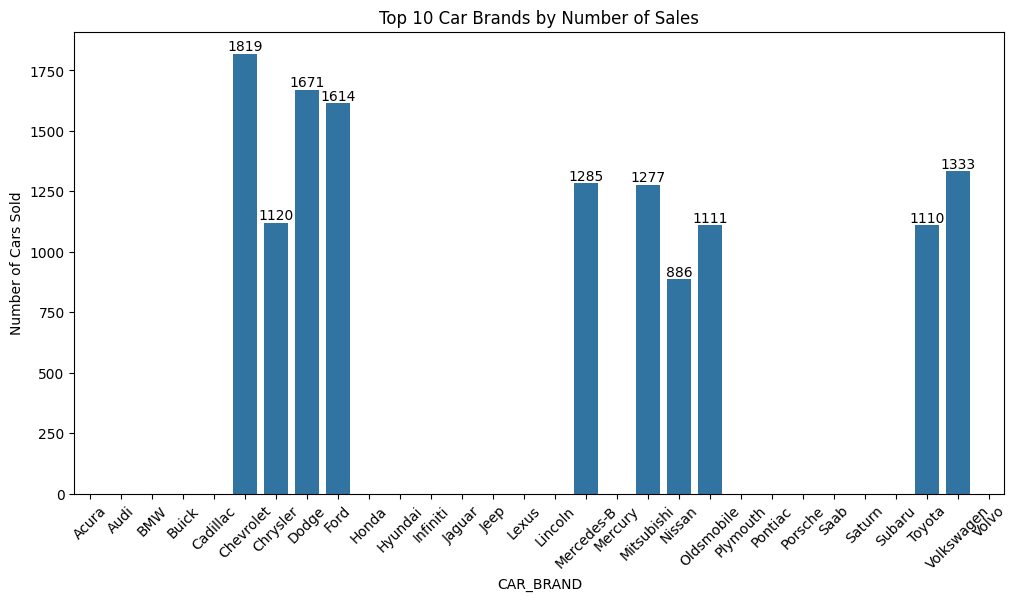

In [41]:
#plot
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_companies.index, y=top_companies.values)
plt.xticks(rotation=45)
plt.title('Top 10 Car Brands by Number of Sales')
plt.ylabel('Number of Cars Sold')
#add numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.show()

In [42]:
print("\nTop 10 Car Brands by Number of Sales:")
for brand, count in top_companies.items():
    print(f"{brand}: {count} cars sold")


Top 10 Car Brands by Number of Sales:
Chevrolet: 1819 cars sold
Dodge: 1671 cars sold
Ford: 1614 cars sold
Volkswagen: 1333 cars sold
Mercedes-B: 1285 cars sold
Mitsubishi: 1277 cars sold
Chrysler: 1120 cars sold
Oldsmobile: 1111 cars sold
Toyota: 1110 cars sold
Nissan: 886 cars sold


In [44]:
# Create 'YearMonth' column in YYYY-MM format
df['YearMonth'] = df['TRANSACTION_DATE'].dt.to_period('M').astype(str)

# Aggregate: count number of transactions per month
monthly_sales = df.groupby('YearMonth').size().reset_index(name='Sales')

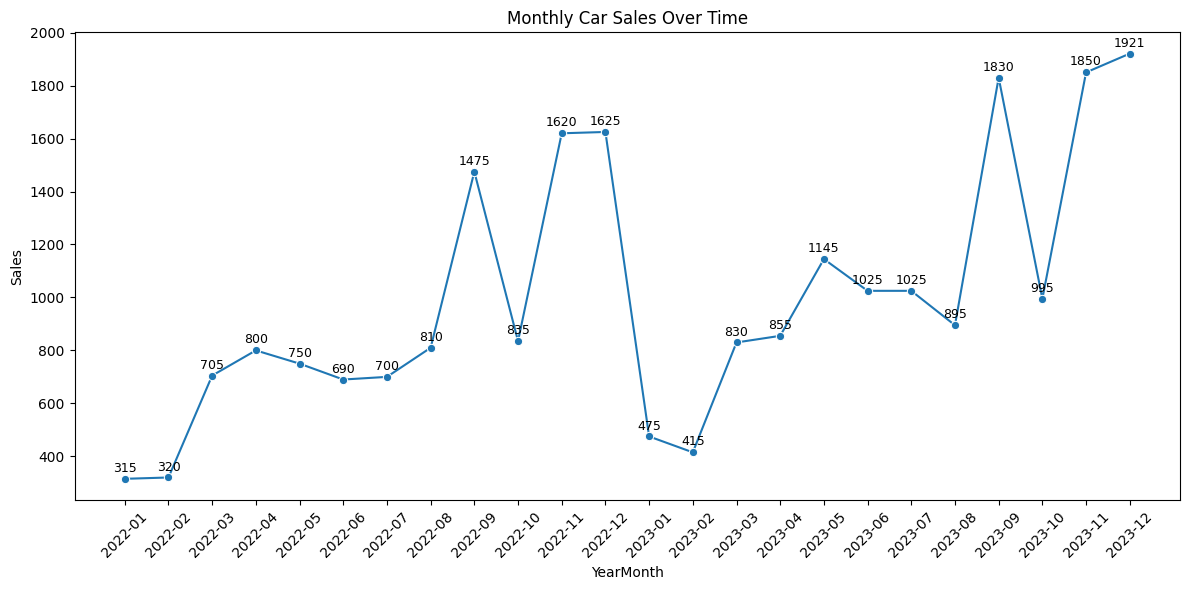

In [46]:
# Plotting
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='YearMonth', y='Sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Car Sales Over Time')
plt.tight_layout()

for x, y in zip(monthly_sales['YearMonth'], monthly_sales['Sales']):
    ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

plt.show()

In [48]:
# Keep as Period object (no .astype(str))
df['YearMonth'] = df['TRANSACTION_DATE'].dt.to_period('M')

monthly_sales = df.groupby('YearMonth').size().reset_index(name='Sales')

# Then, in your loop, you can do:
print("\nMonthly sales:")
for date, sales in zip(monthly_sales['YearMonth'], monthly_sales['Sales']):
    print(f"{date.strftime('%Y-%m')}: {sales} cars sold")


Monthly sales:
2022-01: 315 cars sold
2022-02: 320 cars sold
2022-03: 705 cars sold
2022-04: 800 cars sold
2022-05: 750 cars sold
2022-06: 690 cars sold
2022-07: 700 cars sold
2022-08: 810 cars sold
2022-09: 1475 cars sold
2022-10: 835 cars sold
2022-11: 1620 cars sold
2022-12: 1625 cars sold
2023-01: 475 cars sold
2023-02: 415 cars sold
2023-03: 830 cars sold
2023-04: 855 cars sold
2023-05: 1145 cars sold
2023-06: 1025 cars sold
2023-07: 1025 cars sold
2023-08: 895 cars sold
2023-09: 1830 cars sold
2023-10: 995 cars sold
2023-11: 1850 cars sold
2023-12: 1921 cars sold


In [50]:
best_month_row = monthly_sales.loc[monthly_sales['Sales'].idxmax()]
print(f"\nBest month: {best_month_row['YearMonth'].strftime('%Y-%m')} with {best_month_row['Sales']} cars sold")

average_sales = monthly_sales['Sales'].mean()
print(f"\nAverage monthly sales: {average_sales:.1f} cars")



Best month: 2023-12 with 1921 cars sold

Average monthly sales: 996.1 cars


In [51]:
min_sales = monthly_sales['Sales'].min()
max_sales = monthly_sales['Sales'].max()
std_sales = monthly_sales['Sales'].std()

print(f"\nLowest month sales: {min_sales} cars")
print(f"Highest month sales: {max_sales} cars")
print(f"Standard deviation: {std_sales:.1f} cars ")


Lowest month sales: 315 cars
Highest month sales: 1921 cars
Standard deviation: 481.5 cars 


In [52]:
# Convert YearMonth to year and month columns for easier filtering
monthly_sales['Year'] = monthly_sales['YearMonth'].dt.year

# Total cars sold in 2022 and 2023
total_2022 = monthly_sales.loc[monthly_sales['Year'] == 2022, 'Sales'].sum()
total_2023 = monthly_sales.loc[monthly_sales['Year'] == 2023, 'Sales'].sum()

print(f"Total cars sold in 2022: {total_2022}")
print(f"Total cars sold in 2023: {total_2023}")

# Percentage growth from 2022 to 2023
growth = ((total_2023 - total_2022) / total_2022) * 100
print(f"Percentage growth from 2022 to 2023: {growth:.1f}%")

# Months with sales above average
above_avg_months = monthly_sales.loc[monthly_sales['Sales'] > monthly_sales['Sales'].mean()]

print("\nMonths with sales above average:")
for date, sales in zip(above_avg_months['YearMonth'], above_avg_months['Sales']):
    print(f"{date.strftime('%Y-%m')}: {sales} cars sold")

Total cars sold in 2022: 10645
Total cars sold in 2023: 13261
Percentage growth from 2022 to 2023: 24.6%

Months with sales above average:
2022-09: 1475 cars sold
2022-11: 1620 cars sold
2022-12: 1625 cars sold
2023-05: 1145 cars sold
2023-06: 1025 cars sold
2023-07: 1025 cars sold
2023-09: 1830 cars sold
2023-11: 1850 cars sold
2023-12: 1921 cars sold


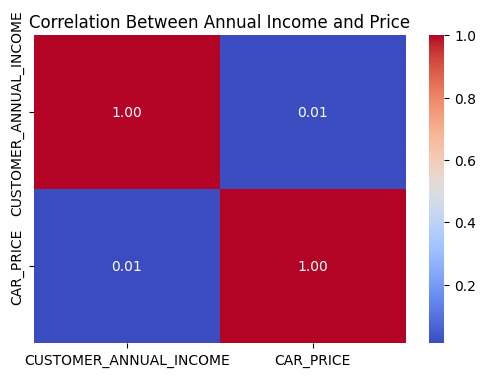


Correlation matrix:
                        CUSTOMER_ANNUAL_INCOME  CAR_PRICE
CUSTOMER_ANNUAL_INCOME                1.000000   0.012065
CAR_PRICE                             0.012065   1.000000


In [54]:
numeric_cols = ['CUSTOMER_ANNUAL_INCOME', 'CAR_PRICE']
corr = df[numeric_cols].corr()

# Plot heatmap with annotations
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Annual Income and Price')
plt.show()

# Print correlation matrix in console
print("\nCorrelation matrix:")
print(corr)

C:\Users\hp\AppData\Local\Temp\ipykernel_17960\620630480.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_df, x='CAR_MODEL', y='Sales', palette='viridis')


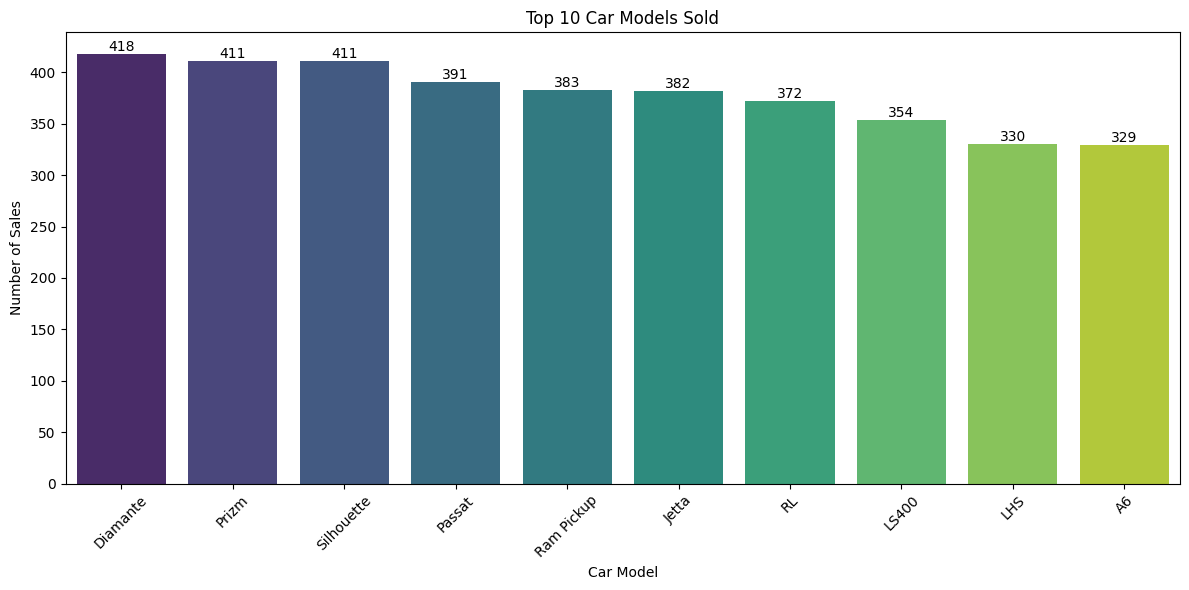

In [60]:
# Create a DataFrame with top 10 car models and their counts
top_10_df = df['CAR_MODEL'].value_counts().nlargest(10).reset_index()
top_10_df.columns = ['CAR_MODEL', 'Sales']

# Remove unused categories by converting to string or removing categories explicitly
top_10_df['CAR_MODEL'] = top_10_df['CAR_MODEL'].astype(str)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_10_df, x='CAR_MODEL', y='Sales', palette='viridis')

plt.xticks(rotation=45)
plt.title('Top 10 Car Models Sold')
plt.xlabel('Car Model')
plt.ylabel('Number of Sales')

# Add numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [61]:
print("\nTop 10 Car Models Sold:")
for model, count in top_models.items():
    print(f"{model}: {count} sales")


Top 10 Car Models Sold:
Diamante: 418 sales
Prizm: 411 sales
Silhouette: 411 sales
Passat: 391 sales
Ram Pickup: 383 sales
Jetta: 382 sales
RL: 372 sales
LS400: 354 sales
LHS: 330 sales
A6: 329 sales


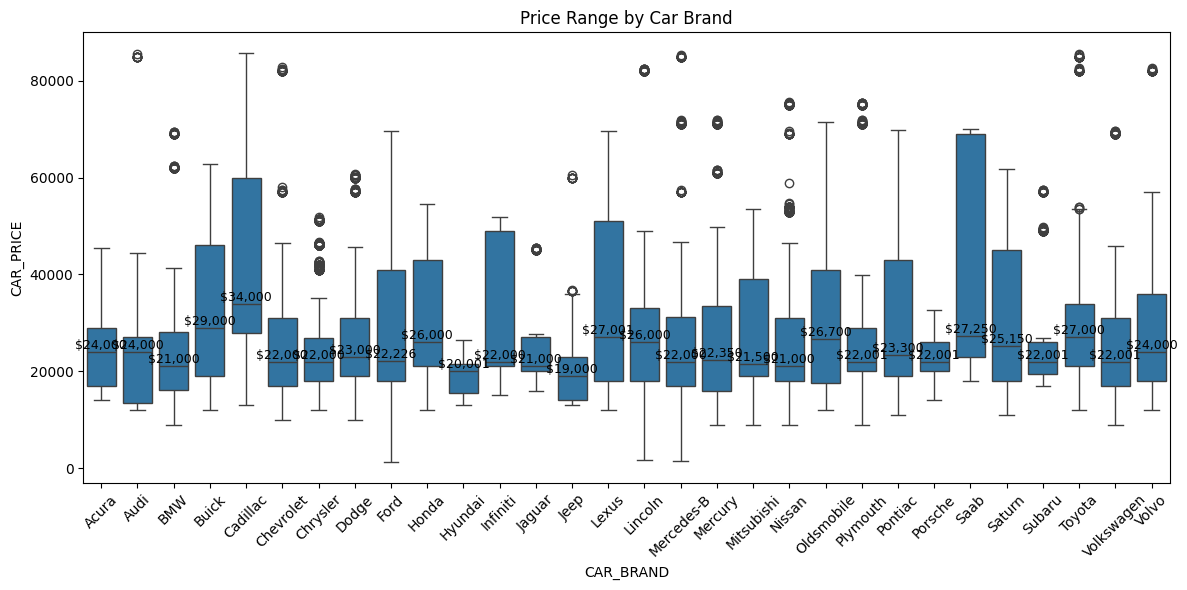

In [64]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='CAR_BRAND', y='CAR_PRICE', data=df)
plt.xticks(rotation=45)
plt.title('Price Range by Car Brand')
plt.ylabel('CAR_PRICE')
plt.xlabel('CAR_BRAND')

# Calculate medians with observed=True to avoid warning
medians = df.groupby('CAR_BRAND', observed=True)['CAR_PRICE'].median()

# Add median labels above each box
for i, company in enumerate(medians.index):
    median_price = medians[company]
    ax.annotate(f'${median_price:,.0f}', 
                (i, median_price), 
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()


In [65]:
print("Median car price by company:")
for company, median_price in medians.items():
    print(f"{company}: ${median_price:,.0f}")

Median car price by company:
Acura: $24,000
Audi: $24,000
BMW: $21,000
Buick: $29,000
Cadillac: $34,000
Chevrolet: $22,000
Chrysler: $22,000
Dodge: $23,000
Ford: $22,226
Honda: $26,000
Hyundai: $20,001
Infiniti: $22,000
Jaguar: $21,000
Jeep: $19,000
Lexus: $27,001
Lincoln: $26,000
Mercedes-B: $22,000
Mercury: $22,350
Mitsubishi: $21,500
Nissan: $21,000
Oldsmobile: $26,700
Plymouth: $22,001
Pontiac: $23,300
Porsche: $22,001
Saab: $27,250
Saturn: $25,150
Subaru: $22,001
Toyota: $27,000
Volkswagen: $22,001
Volvo: $24,000


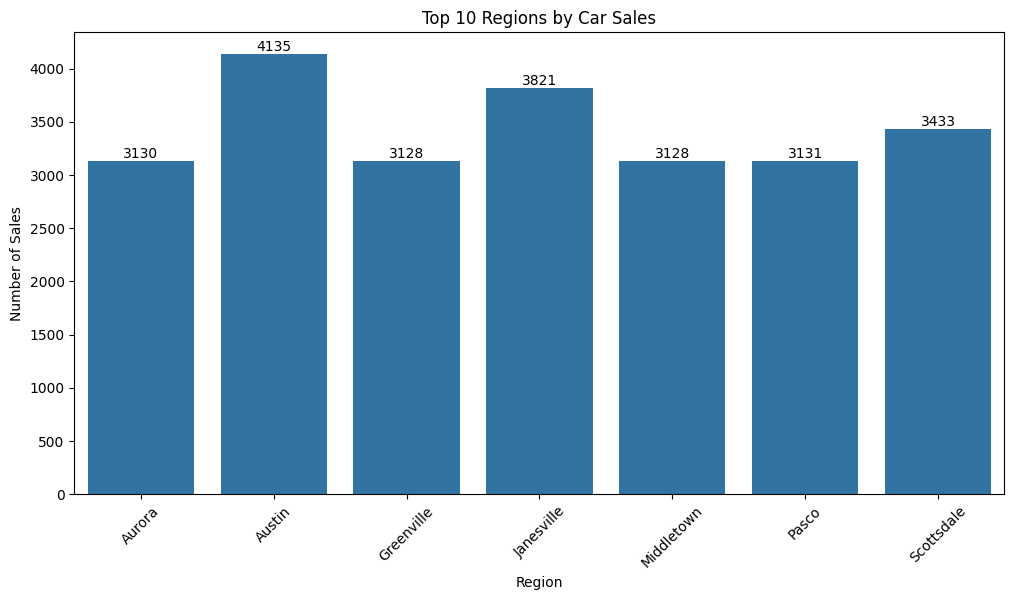

In [66]:
region_sales = df['DEALERSHIP_REGION'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Top 10 Regions by Car Sales')
plt.ylabel('Number of Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)

# Add sales values on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.show()

In [67]:
print("\nTop 10 Regions by Car Sales:")
for region, count in region_sales.items():
    print(f"{region}: {count} sales")


Top 10 Regions by Car Sales:
Austin: 4135 sales
Janesville: 3821 sales
Scottsdale: 3433 sales
Pasco: 3131 sales
Aurora: 3130 sales
Greenville: 3128 sales
Middletown: 3128 sales


C:\Users\hp\AppData\Local\Temp\ipykernel_17960\3263329432.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('CUSTOMER_GENDER')['CAR_PRICE'].median()


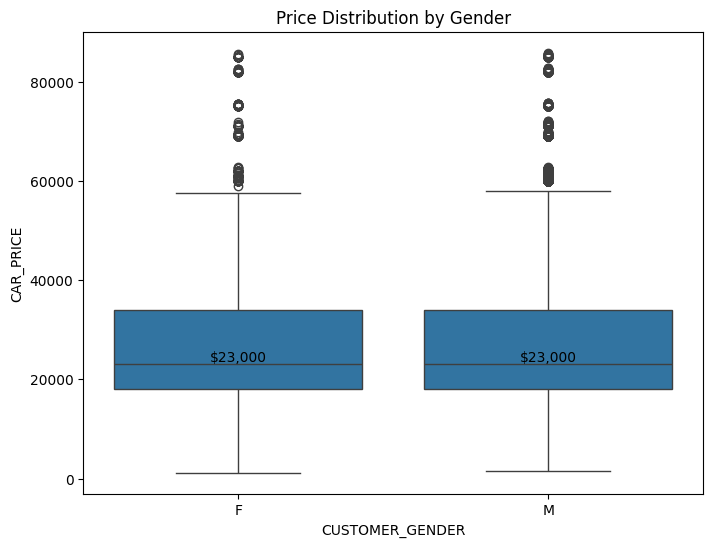

In [68]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='CUSTOMER_GENDER', y='CAR_PRICE', data=df)
plt.title('Price Distribution by Gender')

# Calculate median prices by gender
medians = df.groupby('CUSTOMER_GENDER')['CAR_PRICE'].median()

# Add median labels on the plot
for i, gender in enumerate(medians.index):
    median_price = medians[gender]
    ax.annotate(f'${median_price:,.0f}', 
                (i, median_price), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [71]:
print("Price statistics by gender:")
print(df.groupby('CUSTOMER_GENDER', observed=True)['CAR_PRICE']
         .agg(['count', 'median', 'mean', 'std'])
         .round(2))

Price statistics by gender:
                 count   median      mean       std
CUSTOMER_GENDER                                    
F                 5108  23000.0  28277.27  15150.05
M                18798  23000.0  28039.43  14688.96
